In [71]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from numpy import corrcoef
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , precision_score,recall_score,confusion_matrix,precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
import pickle
import matplotlib.pyplot as plt

In [2]:
#moving to workiing directories
print(os.getcwd());
os.chdir("H:\DRDO");
print(os.getcwd());
from pandas import read_csv
import pandas as pd
file = 'Patient Record.xlsx'
dataset = pd.read_excel(file)
original = dataset

dataset.head()
dataset.shape

C:\Users\tejap
H:\DRDO


(69209, 27)

In [3]:
attributes= list(dataset)
print("attributes are ",attributes)

attributes are  ['ADate', 'pid', 'Age', 'Gender', 'WEIGHT', 'HEIGHT', 'WAIST', 'HIP', 'BP', 'Pulse', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T3', 'T4', 'TGL', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes', 'hypertension', 'thyroid']


In [4]:
#removing the non-required output variables
dataset = dataset.drop(['hypertension','thyroid'],axis=1)
original = original.drop(['hypertension','thyroid'],axis=1)
total = dataset.shape[0]

In [5]:
#removing the tuples which are not having output variable in diabetes coloumn
dataset = dataset[dataset.Diabetes!= ' ']
original = original[original.Diabetes!=' ']
dataset.shape[0]

26217

In [6]:
len(list(dataset))

25

In [7]:
list(dataset.iloc[:,:24])

['ADate',
 'pid',
 'Age',
 'Gender',
 'WEIGHT',
 'HEIGHT',
 'WAIST',
 'HIP',
 'BP',
 'Pulse',
 'BMI',
 'FBS',
 'PPBS',
 'HBa1c',
 'TSH',
 'T3',
 'T4',
 'TGL',
 'T.Chol',
 'HDL',
 'LDL',
 'B.Urea',
 'S.Creat',
 'Uric Acid']

In [8]:
# y.unique()
#removing the non required data that is admission date and patient id
dataset = dataset.drop(columns = ['ADate','pid'])

In [9]:
#conversion of height to numeric data type and dealing with NA's
dataset.HEIGHT = dataset.HEIGHT.convert_objects(convert_numeric=True)
dataset.HEIGHT = dataset.HEIGHT.fillna(150)

original.HEIGHT = original.HEIGHT.convert_objects(convert_numeric=True)
original.HEIGHT = original.HEIGHT.fillna(150)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [10]:
# dataset['FBS'] = dataset['FBS'].convert_objects(convert_numeric=True)
# dataset['PPBS'] = dataset['PPBS'].convert_objects(convert_numeric=True)
# dataset['HBa1c'] = dataset['HBa1c'].convert_objects(convert_numeric=True)
dataset.Gender.unique()

array(['Male', ' ', 'Female'], dtype=object)

In [11]:
#filling of nan and empty values of BMI based upon corresponding gender

till = dataset.shape[0]
temp = 70/(150*150)
for i in range(till):
    if dataset.BMI.iloc[i] == ' ' or np.isnan(dataset.BMI.iloc[i]):
        dataset.BMI.iloc[i] = temp
        
cnt=0
for i in range(till):
    if dataset['BMI'].iloc[i]==0.003111111111111111:
        if(dataset['Gender'].iloc[i] == 'Male'):
            dataset.iloc[i].BMI = 26.6
        else:
            dataset.iloc[i].BMI = 26.5
    if(i%10000 == 0 ):
        print(i)


H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0
10000
20000


H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [12]:
#Uric acid is preprocessed by converting into numeric type and filling NA values based on gender 
dataset['Uric Acid'] = dataset['Uric Acid'].convert_objects(convert_numeric=True)

total = dataset.shape[0]
for i in range(total):
    if np.isnan(dataset['Uric Acid'].iloc[i]):
        if(dataset['Gender'].iloc[i] == 'Male'):
            dataset['Uric Acid'].iloc[i] = 5.2
        else:
            dataset['Uric Acid'].iloc[i] = 4.2
    if(i%10000 == 0 ):
        print(i)

H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0
10000
20000


In [13]:
#preprocessing of S.Creat
dataset['S.Creat'] = dataset['S.Creat'].convert_objects(convert_numeric=True)
cnt=0
for i in range(total):
    if np.isnan(dataset['S.Creat'].iloc[i]):
        if(dataset['Gender'].iloc[i] == 'Male'):
            dataset['S.Creat'].iloc[i] = 1.1
        else:
            dataset['S.Creat'].iloc[i] = 0.9
    if(i%2000 == 0 ):
        print(i)


H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000


In [14]:
total = dataset.shape[0]
for i in range(total):
    if dataset.Gender.iloc[i] == ' ':
        dataset.Gender.iloc[i] = 'Male'

H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
dataset.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [16]:
# dataset['S.Creat'].unique()

In [17]:
dataset.isnull().sum()

Age          0
Gender       0
WEIGHT       0
HEIGHT       0
WAIST        0
HIP          0
BP           0
Pulse        0
BMI          0
FBS          0
PPBS         0
HBa1c        0
TSH          0
T3           0
T4           0
TGL          0
T.Chol       0
HDL          0
LDL          0
B.Urea       0
S.Creat      0
Uric Acid    0
Diabetes     0
dtype: int64

In [18]:
# dataset.Age.unique() remove comment

In [19]:
dataset['Age'] = dataset['Age'].convert_objects(convert_numeric=True)
dataset.Age = dataset.Age.fillna('50')

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [21]:
dataset['WEIGHT'] = dataset['WEIGHT'].convert_objects(convert_numeric=True)
dataset.WEIGHT = dataset.WEIGHT.fillna(70)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [22]:
# datatype conversions
dataset.HBa1c = dataset.HBa1c.convert_objects(convert_numeric=True)
dataset.FBS = dataset.FBS.convert_objects(convert_numeric=True)
dataset.PPBS = dataset.PPBS.convert_objects(convert_numeric=True)


H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipyk

In [23]:
#finding average of mtfbs , mtppbs , mthba1c
mtfbs = 0 ; mtppbs = 0; mthba1c= 0;
sfbs = 0;sppbs=0;shba1c=0
total = dataset.shape[0]
for i in range(total):
    if np.isnan(dataset.iloc[i].FBS):
        mtfbs = mtfbs+1
    else:
        sfbs = sfbs +   dataset.iloc[i].FBS  
    if np.isnan(dataset.iloc[i].PPBS):
        mtppbs = mtppbs+1
    else:
        sppbs = sppbs + dataset.iloc[i].PPBS
    if np.isnan(dataset.iloc[i].HBa1c):
        mthba1c = mthba1c+1
    else:
        shba1c = shba1c + dataset.iloc[i].HBa1c

In [24]:
afbs = sfbs / (total - mtfbs)
appbs = sppbs / (total - mtppbs)
ahba1c = shba1c / (total - mthba1c)

print(afbs)
print(appbs)
print(ahba1c)

144.0700739154463
220.38403467655147
9.087264457176696


In [25]:
#replacing all nan values with avg for fbs , ppbs, ,hba1c
dataset.FBS = dataset.FBS.fillna(afbs)
dataset.PPBS = dataset.PPBS.fillna(appbs)
dataset.HBa1c = dataset.HBa1c.fillna(ahba1c)

In [26]:
#preprocessing of BMI
dataset.BMI = dataset.BMI.convert_objects(convert_numeric=True)
dataset.BMI = dataset.BMI.fillna(21)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [27]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'WAIST', 'HIP', 'BP', 'Pulse', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T3', 'T4', 'TGL', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes']


In [28]:
dataset['WAIST'].unique()

array([' ', 0, 89.3, 87.3, 75.1, 68.4, 48.5, 162, 165, 146], dtype=object)

In [29]:
#waist preprocessing
dataset.WAIST = dataset.WAIST.convert_objects(convert_numeric=True)
value = 0
count = 0
total = dataset.shape[0]
for i in range(total):
    if ( (np.isnan(dataset.WAIST.iloc[i]) == False) and (dataset.WAIST.iloc[i]!=0) ):
        value = value + dataset.WAIST.iloc[i]
        count = count + 1
avgwaist = value/count
print(value)
print(count)
print(avgwaist)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


841.6
8
105.2


In [30]:
dataset.WAIST = dataset.WAIST.fillna(avgwaist)

In [31]:
dataset['HIP'].unique()

array([' ', 0, 113], dtype=object)

In [32]:
#waist preprocessing
dataset.HIP = dataset.HIP.convert_objects(convert_numeric=True)
value = 0
count = 0
total = dataset.shape[0]
for i in range(total):
    if ( (np.isnan(dataset.HIP.iloc[i]) == False) and (dataset.HIP.iloc[i]!=0) ):
        value = value + dataset.HIP.iloc[i]
        count = count + 1
avghip = value/count
print(value)
print(count)
print(avghip)
dataset.HIP = dataset.HIP.fillna(avghip)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


113.0
1
113.0


In [33]:
dataset.BP.unique()

array([' ', '120/80', '130/90', ..., '83/70', '153/88', '161/72'],
      dtype=object)

In [34]:
for i in range(total):
    if dataset['BP'].iloc[i]== ' ':
        dataset['BP'].iloc[i] = '130/80'
dataset.BP = dataset.BP.convert_objects(convert_numeric=True)

H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [35]:
dataset.Pulse.unique()

array([' ', 90, 80, 93, 99, 107, 98, 94, 79, 76, 75, 101, 96, 91, 86, 65,
       84, 62, 59, 70, 74, 68, 67, 92, 82, 78, 85, 89, 103, 57, 77, 106,
       61, 53, 87, 72, 64, 73, 71, 69, 81, 117, 97, 105, 109, 100, 102,
       113, 88, 63, 123, 112, 115, 114, 108, 95, 60, 83, 104, 111, 116,
       66, 122, 118, 56, 50, 125, 121, 55, 120, 130, 131, 93.1, 110, 126,
       142, 58, 66.8, 127, 86.2, 141, 75.4, 119, 128, 134, 64.3, 136,
       72.7, 124, 144, 89.6, 54, 92.6, 73.7, 67.5, 7, 74.9, 137, 133,
       65.1, 53.6, 69.3, 63.8, 911, 70.7, 135, 129, 70.2, 88.2, 140, 91.2,
       145, 132, 46, 8, 10, 146, 16, 88.3, 80.9, 139, 98.3, 85.6, 86.6,
       81.3, 100.4, 39, 138, 55.9, 47, 72.3, 6, 17, 101.3, 60.1, 73.5,
       77.7, 131.1, 78.9, 88.7, 143, 73.3, 51, 9, 14.9, 41], dtype=object)

In [36]:
#pulse preprocessing
dataset.Pulse = dataset.Pulse.convert_objects(convert_numeric=True)
value = 0
count = 0
total = dataset.shape[0]
for i in range(total):
    if ( (np.isnan(dataset.Pulse.iloc[i]) == False) and (dataset.Pulse.iloc[i]!=0) ):
        value = value + dataset.HIP.iloc[i]
        count = count + 1
avgpulse = value/count
print(value)
print(count)
print(avgpulse)
dataset.Pulse = dataset.Pulse.fillna(avgpulse)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


18645.0
12928
1.4422184405940595


In [37]:
(dataset[dataset.TSH == ' ']).shape #19406 ' '

(19406, 23)

In [38]:
dataset.TSH.unique()

array([' ', 2.76, 1.63, ..., 23.49, 6.39, 8.5], dtype=object)

In [39]:
#tsh preprocessing
dataset.TSH = dataset.TSH.convert_objects(convert_numeric=True)
value = 0
count = 0
total = dataset.shape[0]
for i in range(total):
    if ( (np.isnan(dataset.TSH.iloc[i]) == False) and (dataset.TSH.iloc[i]!=0) ):
        value = value + dataset.TSH.iloc[i]
        count = count + 1
avgtsh = value/count
print(value)
print(count)
print(avgtsh)
dataset.TSH = dataset.TSH.fillna(avgtsh)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


41898.58499999991
6811
6.151605491117297


In [40]:
dataset.T3.unique()

array([' ', 120, 1.95, 1.49, 0.87, 76, 0.73, 1.26, 1.57, 6.93, 1.51, 3.42,
       1.06, 1.22, 1.08, 1.67, 1.54, 0.77, 0.92, 1.82, 0.9, 1.01, 0.72,
       0.98, 0.71, 1.74, 1.07, 0.93, 1.46, 1.21, 1.34, 0.95, 1.1, 0.89,
       1.28, 0.91, 0.55, 0.63, 1.45, 1.6, 1.09, 1.71, 1.13, 1.32, 1.39,
       1.31, 0.94, 1.16, 1.64, 1.43, 1.27, 1.53, 1.36, 1.17, 1.2, 1.62,
       0.75, 1.4, 1.76, 1.02, 0.69, 0.88, 2.47, 1.44, 1.15, 1.48, 1.11,
       1.37, 0.8, 0.83, 1.24, 0.65, 1.23, 0.81, 1.29, 2.16, 6.74, 0.78,
       2.29, 2.24, 3.1, 2.43, 1.55, 1.04, 1.33, 1.19, 1.52, 0.84, 11.64,
       1.42, 0.99, 5.35, 0.785, 1.05, 0.97, 0.68, 1.18, 0.86, 0.7, 0.76,
       108.97, 1.25, 1, 0.82, 1.35, 1.38, 1.79, 1.84, 1.12, 120.18, 4.9,
       1.98, 4.21, 4.84, 1.65, 2.91, 3.33, 1.89, 1.14, 0.79, 0.62, 0.41,
       2.14, 2.11, 1.03, 1.83, 0.67, 2.05, 3.16, 0.96, 1.58, 6.51, 1.3,
       1.41, 2.06, 118.14, 0.85, 1.69, 0.59, 0.74, 94, 2.56, 2.57, 2.66,
       2.45, 1.66, 1.47, 72, 113.72, 0.38, 1.61, '0..69'

In [41]:
(dataset[dataset.T3 == ' ']).shape

(22639, 23)

In [42]:
(dataset[dataset.T4 == ' ']).shape

(21913, 23)

In [43]:
(dataset[dataset.TGL == ' ']).shape

(21582, 23)

In [44]:
(dataset[dataset['T.Chol'] == ' ']).shape

(20596, 23)

In [47]:
(dataset[dataset['HDL'] == ' ']).shape

(25893, 23)

In [48]:
(dataset[dataset['LDL'] == ' ']).shape

(21426, 23)

In [49]:
(dataset[dataset['B.Urea'] == ' ']).shape

(23390, 23)

In [51]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'WAIST', 'HIP', 'BP', 'Pulse', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T3', 'T4', 'TGL', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes']


In [52]:
list(dataset.iloc[:,:18])

['Age',
 'Gender',
 'WEIGHT',
 'HEIGHT',
 'WAIST',
 'HIP',
 'BP',
 'Pulse',
 'BMI',
 'FBS',
 'PPBS',
 'HBa1c',
 'TSH',
 'T3',
 'T4',
 'TGL',
 'T.Chol',
 'HDL']

In [53]:
# dataset['Gender'] = dataset['Gender'].convert_objects(convert_numeric=True)  not working
dataset['Gender'].unique()


array(['Male', 'Female'], dtype=object)

In [54]:
dataset['Gender'] = pd.factorize(dataset['Gender'])[0]
dataset['Gender'].unique()

array([0, 1], dtype=int64)

In [55]:
dataset['BP'].unique()
BP = dataset.BP

In [56]:
# dataset['BP'] = dataset['BP'].convert_objects(convert_numeric=True) does't work
dataset['BP'] = pd.factorize(dataset['BP'])[0]
dataset['BP'].unique()

array([   0,    1,    2, ..., 3104, 3105, 3106], dtype=int64)

In [57]:
for i in range(dataset.shape[1]):
    print(list(dataset)[i])
    print(type(dataset.iloc[:,i][0]))

Age
<class 'float'>
Gender
<class 'numpy.int64'>
WEIGHT
<class 'numpy.float64'>
HEIGHT
<class 'numpy.float64'>
WAIST
<class 'numpy.float64'>
HIP
<class 'numpy.float64'>
BP
<class 'numpy.int64'>
Pulse
<class 'numpy.float64'>
BMI
<class 'numpy.float64'>
FBS
<class 'numpy.float64'>
PPBS
<class 'numpy.float64'>
HBa1c
<class 'numpy.float64'>
TSH
<class 'numpy.float64'>
T3
<class 'str'>
T4
<class 'str'>
TGL
<class 'str'>
T.Chol
<class 'str'>
HDL
<class 'str'>
LDL
<class 'str'>
B.Urea
<class 'str'>
S.Creat
<class 'numpy.float64'>
Uric Acid
<class 'numpy.float64'>
Diabetes
<class 'str'>


In [58]:
#factorize coloumns in order to send into algorithms and to find correlation
Diabetes = dataset.Diabetes
dataset['T3'] = pd.factorize(dataset['T3'])[0]
dataset['T4'] = pd.factorize(dataset['T4'])[0]
dataset['TGL'] = pd.factorize(dataset['TGL'])[0]
dataset['T.Chol'] = pd.factorize(dataset['T.Chol'])[0]
dataset['HDL'] = pd.factorize(dataset['HDL'])[0]
dataset['LDL'] = pd.factorize(dataset['LDL'])[0]
dataset['B.Urea'] = pd.factorize(dataset['B.Urea'])[0]
dataset['Diabetes'] = pd.factorize(dataset['Diabetes'])[0]


In [59]:
mat1 = pd.DataFrame(index=['accuracy'],columns=['logistic','knn','SVC','Naive Bayes'
                        ,'decision tree'])

In [62]:
print(list(dataset))
print(len(list(dataset)))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'WAIST', 'HIP', 'BP', 'Pulse', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T3', 'T4', 'TGL', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes']
23


In [64]:
x = dataset.iloc[:,:22]
y = dataset.Diabetes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14)

In [65]:
#logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(x)
mat1.loc['accuracy','logistic'] = metrics.accuracy_score(y, lrprediction)
print(metrics.accuracy_score(y, lrprediction)) #75.5

0.7593927604226265


In [66]:
#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("model fitting done")
print("prediction going on")
prediction_knn= knn.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction_knn))
mat1.loc['accuracy','knn'] = metrics.accuracy_score(y_test, prediction_knn)
print(metrics.accuracy_score(y_test, prediction_knn))#84% ,


model fitting done
prediction going on
[[3917    6    4 ...    0    0    0]
 [ 212    6    2 ...    0    0    0]
 [  75    0   42 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7601067887109078


In [67]:
# SVC
model =SVC()
model.fit(X_train,y_train)
print("model fitting done")
prediction_svc= model.predict(X_test)
print("prediction going on")
print(metrics.confusion_matrix(y_test,prediction_svc))
mat1.loc['accuracy','SVC'] = metrics.accuracy_score(y_test, prediction_svc)
print(metrics.accuracy_score(y_test, prediction_svc)) #83.7 


model fitting done
prediction going on
[[3934    0    0 ...    0    0    0]
 [ 210   10    1 ...    0    0    0]
 [  90    0   27 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7623951182303585


In [68]:
#naive Bayes
NBC = GaussianNB()
NBC.fit(X_train,y_train)
y_pred_test = NBC.predict(X_test)
mat1.loc['accuracy','Naive Bayes'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #72% , after pulse drop 10.5%

0.013920671243325706


In [69]:
#decision tree
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 10)
class_tree.fit(X_train,y_train)
y_pred_test = class_tree.predict(X_test)
mat1.loc['accuracy','decision tree'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #85% , after pulse drop 83.9
# print(metrics.recall_score(y_pred=y_pred_test,y_true=y_test))

0.7721205186880244


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FD2FEC50>>

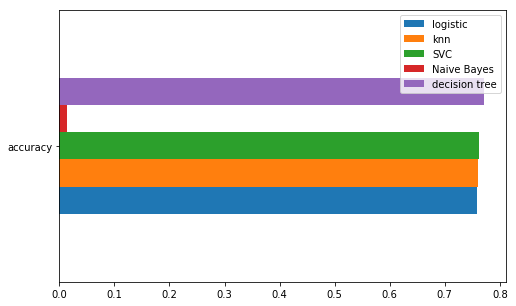

In [73]:
fig,ax = plt.subplots(figsize=(8,5))
mat1.plot(kind='barh',ax=ax)
ax.grid

In [74]:
#finding correlation coefficent between input variables
for i in range(1,dataset.shape[1]):
    for j in range(1,dataset.shape[1]):
        if(i!=j):
            temp=corrcoef(dataset.iloc[:,i],dataset.iloc[:,j])[0,1]
            if( (temp<= -float(0.5) or temp>=float(0.5)) ):            
                print('cols having dependency are :',i,j,list(dataset)[i],list(dataset)[j])
    print('----------------------------------------')

----------------------------------------
----------------------------------------
----------------------------------------
cols having dependency are : 4 5 WAIST HIP
----------------------------------------
cols having dependency are : 5 4 HIP WAIST
----------------------------------------
cols having dependency are : 6 7 BP Pulse
----------------------------------------
cols having dependency are : 7 6 Pulse BP
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
----------------------------------------
cols having dependency are : 13 14 T3 T4
----------------------------------------
cols having dependency are : 14 13 T4 T3
----------------------------------------
cols having dependency are : 15 16 TGL T.Chol
----------------------------------------
cols having dependency are : 16 15 T.Chol TGL
----------------------------------------


In [75]:
print(list(attributes))

['ADate', 'pid', 'Age', 'Gender', 'WEIGHT', 'HEIGHT', 'WAIST', 'HIP', 'BP', 'Pulse', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T3', 'T4', 'TGL', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes', 'hypertension', 'thyroid']


In [76]:
# waist , hip , bp, pulse are having dependence on each other
# so we are removing pulse, and hip
dataset = dataset.drop(columns = ['WAIST']) # have to deal with waist
dataset = dataset.drop(['Pulse','T3','TGL'],axis=1)

In [77]:
dataset.Diabetes = Diabetes
dataset.BP = BP
print(list(dataset))
print(len(list(dataset)))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'HIP', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'T4', 'T.Chol', 'HDL', 'LDL', 'B.Urea', 'S.Creat', 'Uric Acid', 'Diabetes']
19


In [78]:
 pd.factorize(dataset['Diabetes'])[0]

array([0, 0, 0, ..., 3, 8, 3], dtype=int64)

In [79]:
#because of less availability of values , removing

dataset = dataset.drop(['HDL','LDL','B.Urea','Uric Acid'],axis=1)
dataset = dataset.drop(['T4','T.Chol'],axis=1)

In [80]:
len(list(dataset))

13

In [85]:
dataset.BP = pd.factorize(dataset.BP)[0]
x = dataset.iloc[:,:12]
# y=dataset.Diabetes
y = pd.factorize(dataset['Diabetes'])[0]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14)

In [86]:
#logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(x)
mat1.loc['accuracy','logistic'] = metrics.accuracy_score(y, lrprediction)
print(metrics.accuracy_score(y, lrprediction)) #75.5

0.7559598733646108


In [87]:
#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("model fitting done")
print("prediction going on")
prediction_knn= knn.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction_knn))
mat1.loc['accuracy','knn'] = metrics.accuracy_score(y_test, prediction_knn)
print(metrics.accuracy_score(y_test, prediction_knn))#84% 

model fitting done
prediction going on
[[3919    1    2 ...    0    0    0]
 [ 210    5    3 ...    0    0    0]
 [  72    1   43 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7601067887109078


In [88]:
# SVC
model =SVC()
model.fit(X_train,y_train)
print("model fitting done")
prediction_svc= model.predict(X_test)
print("prediction going on")
print(metrics.confusion_matrix(y_test,prediction_svc))
mat1.loc['accuracy','SVC'] = metrics.accuracy_score(y_test, prediction_svc)
print(metrics.accuracy_score(y_test, prediction_svc)) #83.7 

model fitting done
prediction going on
[[3929    0    1 ...    0    0    0]
 [ 208   11    1 ...    0    0    0]
 [  93    0   24 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7618230358504958


In [89]:

#naive Bayes
NBC = GaussianNB()
NBC.fit(X_train,y_train)
y_pred_test = NBC.predict(X_test)
mat1.loc['accuracy','Naive Bayes'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #72% , after pulse drop 10.5%


0.034324942791762014


In [90]:
#decision tree
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 10)
class_tree.fit(X_train,y_train)
y_pred_test = class_tree.predict(X_test)
mat1.loc['accuracy','decision tree'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #85% , after pulse drop 83.9
# print(metrics.recall_score(y_pred=y_pred_test,y_true=y_test))


0.7740274599542334


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FDB54F60>>

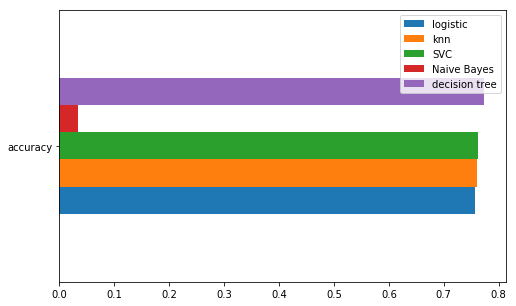

In [92]:
fig,ax = plt.subplots(figsize=(8,5))
mat1.plot(kind='barh',ax=ax)
ax.grid

In [ ]:
#deal with zeros

In [93]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'HIP', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'S.Creat', 'Diabetes']


In [94]:
#dealing with zeros

In [95]:
total = dataset.shape[0]

In [96]:
dataset.Age = dataset.Age.convert_objects(convert_numeric=True)

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [97]:
dataset.WEIGHT[dataset.WEIGHT == 0]=70

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [98]:
# dataset.WEIGHT.unique()

In [99]:
dataset.HEIGHT[dataset.HEIGHT == 0].shape

(4147,)

In [100]:
#replacing height values with 150 where height =0 initally
dataset.HEIGHT[dataset.HEIGHT == 0] = 150

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
dataset.HIP[dataset.HIP == 0].shape 

(20625,)

In [102]:
dataset = dataset.drop(columns = ['HIP']) # have to deal with hip

In [103]:
#we will add hip/waist ratio after diabetic classification is done

In [104]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'S.Creat', 'Diabetes']


In [105]:
dataset.BP.unique() #next time take data and dataset seperately

array([   0,    1,    2, ..., 3104, 3105, 3106], dtype=int64)

In [106]:
len(BP.unique())

3107

In [107]:
dataset.BMI[dataset.BMI == 0].shape

(4398,)

In [108]:
dataset.BMI[dataset.BMI == 0] = 21

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
dataset.BMI[dataset['S.Creat'] == 0].shape

(0,)

In [111]:
print(list(dataset))
print(len(list(dataset)))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'S.Creat', 'Diabetes']
12


In [112]:
x = dataset.iloc[:,:11]
y = pd.factorize(dataset['Diabetes'])[0]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14)

In [114]:

#logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(x)
mat1.loc['accuracy','logistic'] = metrics.accuracy_score(y, lrprediction)
print(metrics.accuracy_score(y, lrprediction)) #75.5

#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("model fitting done")
print("prediction going on")
prediction_knn= knn.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction_knn))
mat1.loc['accuracy','knn'] = metrics.accuracy_score(y_test, prediction_knn)
print(metrics.accuracy_score(y_test, prediction_knn))#84% ,


# SVC
model =SVC()
model.fit(X_train,y_train)
print("model fitting done")
prediction_svc= model.predict(X_test)
print("prediction going on")
print(metrics.confusion_matrix(y_test,prediction_svc))
mat1.loc['accuracy','SVC'] = metrics.accuracy_score(y_test, prediction_svc)
print(metrics.accuracy_score(y_test, prediction_svc)) #83.7 


#naive Bayes
NBC = GaussianNB()
NBC.fit(X_train,y_train)
y_pred_test = NBC.predict(X_test)
mat1.loc['accuracy','Naive Bayes'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #72% , after pulse drop 10.5%

#decision tree
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 10)
class_tree.fit(X_train,y_train)
y_pred_test = class_tree.predict(X_test)
mat1.loc['accuracy','decision tree'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #85% , after pulse drop 83.9
# print(metrics.recall_score(y_pred=y_pred_test,y_true=y_test))



0.7555021550902087
model fitting done
prediction going on
[[3922    2    2 ...    0    0    0]
 [ 210    5    3 ...    0    0    0]
 [  77    0   39 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7599160945842868
model fitting done
prediction going on
[[3930    0    1 ...    0    0    0]
 [ 206   13    1 ...    0    0    0]
 [  93    0   24 ...    0    0    0]
 ...
 [   1    0    0 ...    0    0    0]
 [   0    0    1 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
0.7623951182303585
0.033943554538520215
0.7797482837528604


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FDCE50F0>>

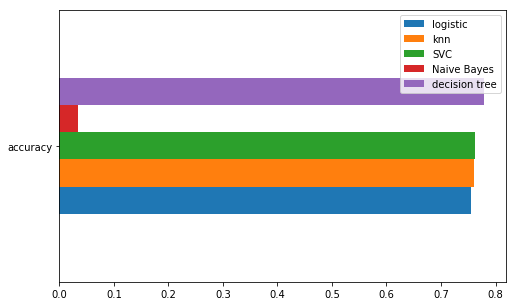

In [115]:
fig,ax = plt.subplots(figsize=(8,5))
mat1.plot(kind='barh',ax=ax)
ax.grid


In [116]:
# consider classfications in diabetes and then
# hip waist ratop from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3121190/

In [117]:
#different categories of output variable provided
dataset.Diabetes.unique()

array(['Type2 diabetes', 'Pre diabetic', 'Type1 diabetes',
       'Type2 diabetes (E11.65)', 'Pregnant Type2 diabetes', 'GDM',
       'Type2 diabetes -newly', 'Type2 diabetes newly diagnoised',
       'Pre diabetic (R73.03)', 'DENOVOType2 diabetes', 'Diabetes',
       '? Type1 diabetes', '?Type2 diabetes', 'denovo Type2 diabetes',
       'Type1 diabetes (E 10.9)', 'Type2 diabetes newly diagnosed',
       'denovoType2 diabetes', '?Type1 diabetes', 'pancreatic diabetes',
       'Type2 diabetes complicated pregnancy', 'R/O Type1 diabetes',
       'Secondary Diabetes', 'Type2 diabetes  - newly diagnosed',
       'Type2 diabetes Newly Diagnosed', 'Type2 diabetes Newly diag',
       'Type2 diabetes with pregnancy', 'Type2 diabetes, new onset',
       'de Novo Type2 diabetes', 'Type2 diabetes Rt.frozen sholder',
       'newly diagnosed Type2 diabetes',
       'Type2 diabetes complicating pregnancy',
       'Type2 diabetes Newly diagnosed', 'Pancreatic Diabetes',
       '? Type2 diabetes', 'Ty

In [118]:
#generalization category 1
dataset.Diabetes[(dataset.Diabetes =='Type2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes (E11.65)') | 
                 (dataset.Diabetes =='?Type2 diabetes') | 
                 (dataset.Diabetes =='Type2 diabetes Rt.frozen sholder') | 
                 (dataset.Diabetes =='? Type2 diabetes') | 
                 (dataset.Diabetes =='Type2 diabetes With BOH') | 
                 (dataset.Diabetes =='Type2 diabetes with single Kidney') |
                 (dataset.Diabetes =='Type2 diabetes uncontrolled') |
                 (dataset.Diabetes =='Type2 diabetes Uncontrolled BG') |
                 (dataset.Diabetes =='? Type2 diabetes (E11.65)') |
                 (dataset.Diabetes =='2* Diabetes') |
                 (dataset.Diabetes =='Type2 diabetes complicating Diabetes')] = 'Type2 diabetes'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [119]:
#generalization category 1
dataset.Diabetes[(dataset.Diabetes =='Type2 diabetes -newly') |
                 (dataset.Diabetes =='Type2 diabetes newly diagnoised') |
                 (dataset.Diabetes =='DENOVOType2 diabetes') |
                 (dataset.Diabetes =='denovo Type2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes newly diagnosed') |
                 (dataset.Diabetes =='denovoType2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes  - newly diagnosed') |
                 (dataset.Diabetes =='Type2 diabetes Newly Diagnosed') |
                 (dataset.Diabetes =='Type2 diabetes Newly diag') |
                 (dataset.Diabetes =='Type2 diabetes, new onset') |
                 (dataset.Diabetes =='de Novo Type2 diabetes') |
                 (dataset.Diabetes =='newly diagnosed Type2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes Newly diagnosed' )|
                 (dataset.Diabetes =='Newly Diagnosed Type2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes Recently Diagnosed') |
                 (dataset.Diabetes =='newly Type2 diabetes' )|
                 (dataset.Diabetes =='Newly diagnosed Type2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes, newly diagnosed.') |
                 (dataset.Diabetes =='Denovo Type2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes de Novo') |
                 (dataset.Diabetes =='DENOVO Type2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes- DENOVO') |
                 (dataset.Diabetes =='de novo Type2 diabetes') |
                 (dataset.Diabetes =='denovo Type2 diabetes (E11.65)') |
                 (dataset.Diabetes =='Type2 diabetes newly Diagnosed')|
                 (dataset.Diabetes =='denovoType2 diabetes (E11.65)')|
                  (dataset.Diabetes =='Type2 diabetes de Nova' )|
                 (dataset.Diabetes =='Type2 diabetes deNovo' )|
                 (dataset.Diabetes =='denvoType2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes, DENOVO' )|
                 (dataset.Diabetes =='denovo -Type2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes denovo' )|
                 (dataset.Diabetes =='deenovoType2 diabetes' )|
                 (dataset.Diabetes =='DenovoType2 diabetes')|
                 (dataset.Diabetes =='denovType2 diabetes')|
                 (dataset.Diabetes =='Type2 diabetes under good control') |
                 (dataset.Diabetes =='denoType2 diabetes')|
                 (dataset.Diabetes =='Denovo ? Type2 diabetes' )|
                 (dataset.Diabetes =='DnovoType2 diabetes' )|
                 (dataset.Diabetes =='?denovoType2 diabetes' )|
                 (dataset.Diabetes =='denovo  Type2 diabetes' )| 
                 (dataset.Diabetes =='deovoType2 diabetes (E11.65)' )|
                 (dataset.Diabetes =='Denovo Type2 diabetes (E11.65)' )|
                 (dataset.Diabetes =='DENOVO Type2 diabetes (E11.65)')|
               (dataset.Diabetes =='Resolved Type2 diabetes (E11.65)' )|
               (dataset.Diabetes =='DenovoType2 diabetes (E11.65)' )|
                 (dataset.Diabetes =='dnovo Type2 diabetes (E11.65)') ] = 'denovo Type2 diabetes' 

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [120]:
#generalization category 3
dataset.Diabetes[(dataset.Diabetes =='GDM') |
                 (dataset.Diabetes =='? GDM') |
                 (dataset.Diabetes =='past GDM') |
                 (dataset.Diabetes =='GDM (O 24.410)')|
                 (dataset.Diabetes =='?Type2 diabetes,GDM')|
                 (dataset.Diabetes =='? GDM (O 24.410)')|
                 (dataset.Diabetes =='?GDM (O 24.410)')
                ] = 'GDM'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
#generalization category 4
dataset.Diabetes[(dataset.Diabetes =='Type1 diabetes') |
                 (dataset.Diabetes =='? Type1 diabetes' )|
                 (dataset.Diabetes =='Type1 diabetes (E 10.9)') |
                 (dataset.Diabetes =='?Type1 diabetes' )| 
                 (dataset.Diabetes =='R/O Type1 diabetes' )|
                 (dataset.Diabetes =='?Type1 diabetes (E 10.9)' )|
                 (dataset.Diabetes =='? Type1 diabetes (E 10.9)') |
                 (dataset.Diabetes =='Type1B  Diabetes')
                ]='Type1 diabetes'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [122]:
#generalization category 5
dataset.Diabetes[(dataset.Diabetes =='Pregnant Type2 diabetes') |
                 (dataset.Diabetes =='Type2 diabetes complicated pregnancy') |
                 (dataset.Diabetes =='Type2 diabetes with pregnancy' )|
                 (dataset.Diabetes =='Type2 diabetes complicating pregnancy') |
                 (dataset.Diabetes =='pregnancy complicated by Type2 diabetes') |
                 (dataset.Diabetes =='Pregnant with Type2 diabetes' )|
                 (dataset.Diabetes =='GDM with precious pregnancy' )|
                 (dataset.Diabetes =='Prgnant with Type2 diabetes' )|
                 (dataset.Diabetes =='Type2 diabetes (E11.65) complicating Pregnancy')
                ]='Pregnant Diabetes'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [123]:
#generalization category 6
dataset.Diabetes[(dataset.Diabetes =='MODY --Type2 diabetes') |
                 (dataset.Diabetes =='MODYType2 diabetes') |
                 (dataset.Diabetes =='?MODY' )|
                 (dataset.Diabetes =='? MODY')
                ] = 'MODY'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [124]:
#generalization category 7
dataset.Diabetes[(dataset.Diabetes =='Pre diabetic') |
                 (dataset.Diabetes =='Pre diabetic (R73.03)') |
                 (dataset.Diabetes =='Diabetes') |
                 (dataset.Diabetes =='Secondary Diabetes' )|
                 (dataset.Diabetes =='secondary  diabetes') |
                 (dataset.Diabetes =='scondary diabetes' )|
                 (dataset.Diabetes =='chronic pancreatitis') |
                 (dataset.Diabetes =='?secondary Diabetes' )|
                 (dataset.Diabetes =='secondary' )|
                 (dataset.Diabetes =='IFG' )|
                 (dataset.Diabetes =='pancreatic diabetes')|
                   (dataset.Diabetes =='Secondary Diabetes')|
                 (dataset.Diabetes =='Pancreatic Diabetes' )|
                 (dataset.Diabetes =='Pancriatic diabetes')
                ] = 'Diabetes'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [125]:
#generalization category 8
dataset.Diabetes[(dataset.Diabetes == 'Type1 diabetes  de Novo') |
                 (dataset.Diabetes == 'Type1 diabetes de Novo') |
                  (dataset.Diabetes == 'denovo Type1 diabetes') |
                 (dataset.Diabetes == 'denovoType1 diabetes') |
                 (dataset.Diabetes == 'MODY')
                ] = 'denovo Type1 diabetes'

H:\installed_in_edu\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [126]:

x = dataset.iloc[:,:11]
y = dataset.Diabetes


In [127]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=14)

In [129]:

#logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(x)
mat1.loc['accuracy','logistic'] = metrics.accuracy_score(y, lrprediction)
print(metrics.accuracy_score(y, lrprediction)) #75.5


0.8344204142350383


In [130]:
#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("model fitting done")
print("prediction going on")
prediction_knn= knn.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction_knn))
mat1.loc['accuracy','knn'] = metrics.accuracy_score(y_test, prediction_knn)
print(metrics.accuracy_score(y_test, prediction_knn))#84% ,


model fitting done
prediction going on
[[   2    5    0    5  255    0    0]
 [   2   12    0    7   94    0    5]
 [   1    0    0    0    3    0    0]
 [   0    2    0   45  103    0    0]
 [   2   14    0    6 4308    0    3]
 [   0    0    0    8    3    0    0]
 [   5    0    0    0  351    0    3]]
0.8333333333333334


In [131]:
# SVC
model =SVC()
model.fit(X_train,y_train)
print("model fitting done")
prediction_svc= model.predict(X_test)
print("prediction going on")
print(metrics.confusion_matrix(y_test,prediction_svc))
mat1.loc['accuracy','SVC'] = metrics.accuracy_score(y_test, prediction_svc)
print(metrics.accuracy_score(y_test, prediction_svc)) #83.7 


model fitting done
prediction going on
[[  15    1    0    1  250    0    0]
 [   1   13    0    3  102    0    1]
 [   0    0    0    0    4    0    0]
 [   0    2    0   27  121    0    0]
 [   0    8    0    1 4322    0    2]
 [   0    0    0    1    8    2    0]
 [   0    0    0    1  348    0   10]]
0.8369565217391305


In [132]:
#naive Bayes
NBC = GaussianNB()
NBC.fit(X_train,y_train)
y_pred_test = NBC.predict(X_test)
mat1.loc['accuracy','Naive Bayes'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #72% , after pulse drop 10.5%


0.06960335621662853


In [133]:
#decision tree
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 10)
class_tree.fit(X_train,y_train)
y_pred_test = class_tree.predict(X_test)
mat1.loc['accuracy','decision tree'] = metrics.accuracy_score(y_test,y_pred_test)
print(metrics.accuracy_score(y_test,y_pred_test)) #85% , after pulse drop 83.9
# print(metrics.recall_score(y_pred=y_pred_test,y_true=y_test))


0.8482074752097636


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FD019BA8>>

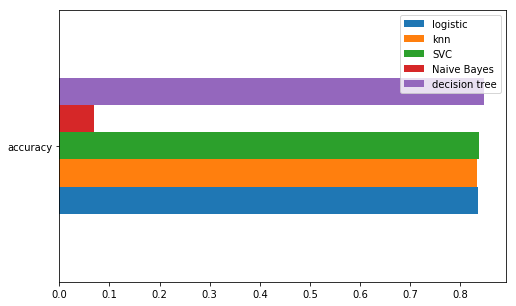

In [135]:
fig,ax = plt.subplots(figsize=(8,5))
mat1.plot(kind='barh',ax=ax)
ax.grid

In [136]:
np.unique(lrprediction)

array(['Diabetes', 'GDM', 'Type1 diabetes', 'Type2 diabetes'],
      dtype=object)

In [137]:
#covariance , normalization , hip weight ratio , graphs , multi category classifer like svm

#have to try with svm , ann , random forest  then app
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3121190/
#same watch for visualization as well

#first do exception andling

In [138]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'S.Creat', 'Diabetes']


In [139]:
print(dataset.WEIGHT.max())
dataset.WEIGHT.min()

6702.0


1.7

In [140]:
dataset.shape

(26217, 12)

In [141]:
dataset = dataset[dataset.WEIGHT<=200]

In [142]:
print(dataset.HEIGHT.max())
print(dataset.HEIGHT.min())

194.0
0.9


In [143]:
print(dataset.BP.max())
print(dataset.BP.min())

3106
0


In [144]:
print(dataset['S.Creat'].max())
print(dataset['S.Creat'].min())
print(dataset['S.Creat'].unique())

216.0
0.07
[1.1000e+00 9.0000e-01 1.3000e+00 1.0000e+00 7.0000e-01 1.2000e+00
 5.0000e-01 8.0000e-01 3.3000e+00 2.7000e+00 2.9000e+00 2.4000e+00
 1.6000e+00 1.5000e+00 6.0000e-01 1.2200e+00 9.2000e-01 2.2000e+00
 6.6000e-01 8.1000e-01 1.8000e+00 1.0100e+00 8.9000e-01 2.1000e+00
 9.5000e-01 3.0000e+00 2.4000e+01 1.4000e+00 2.0000e+00 1.6700e+00
 1.7000e+00 9.3000e-01 2.6000e+00 7.7000e-01 6.7000e-01 8.4000e-01
 5.8000e-01 6.9000e-01 5.3000e-01 1.0700e+00 4.0000e+00 9.5000e+01
 5.5000e-01 1.2100e+00 6.5000e-01 3.5000e+00 7.0000e+00 1.0200e+02
 9.9000e-01 7.1000e-01 7.8000e-01 9.7000e-01 1.2800e+00 1.1400e+00
 1.0900e+00 6.4000e-01 5.7000e-01 7.9000e-01 4.6000e-01 4.0000e-01
 3.6000e+00 3.0000e-01 3.1000e+00 2.3000e+00 1.0000e-01 1.1700e+00
 1.3800e+00 5.6000e-01 6.1000e-01 1.0200e+00 1.0500e+00 1.4900e+02
 6.2000e-01 1.1900e+00 8.7000e-01 8.6000e-01 4.8000e+00 1.9000e+00
 8.0000e+00 4.4000e+00 1.0400e+00 8.2000e-01 1.3400e+00 8.5000e-01
 8.3000e-01 1.2400e+00 8.0000e+01 1.1200e+00 8.2700

In [145]:
# dataset.to_csv("60k_preprocess_by_final_preprocess.csv")

In [146]:
#screat outliers handling
print(dataset.shape) 
dataset = dataset[dataset['S.Creat']<10]
print(dataset.shape)

(26207, 12)
(26176, 12)


In [147]:
 # preprocess outlier value in BMI
for i in range(dataset.shape[0]):
    if dataset['BMI'].iloc[i]==0.003111111111111111:
        if(dataset['Gender'].iloc[i] == 0):
            dataset.iloc[i].BMI = 26.6
        else:
            dataset.iloc[i].BMI = 26.5
    if(i%10000 == 0 ):
        print(i)

H:\installed_in_edu\anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0
10000
20000


In [148]:
print(list(dataset))

['Age', 'Gender', 'WEIGHT', 'HEIGHT', 'BP', 'BMI', 'FBS', 'PPBS', 'HBa1c', 'TSH', 'S.Creat', 'Diabetes']


In [149]:
# dataset.to_csv("60k_preprocess_by_final_preprocess_part2.csv")

In [150]:
x = dataset.iloc[:,:11]
y = dataset.Diabetes
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [151]:
#decision tree classification

class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 14)



In [152]:
#logistic
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(x)
mat1.loc['accuracy','logistic'] = metrics.accuracy_score(y, lrprediction)
print('logistic reg accuracy is : ',metrics.accuracy_score(y, lrprediction)) #75.5

#knn
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)
print("model fitting done")
print("prediction going on")
prediction_knn= knn.predict(X_test)
print(metrics.confusion_matrix(y_test,prediction_knn))
mat1.loc['accuracy','knn'] = metrics.accuracy_score(y_test, prediction_knn)
print('knn accuracy is : ',metrics.accuracy_score(y_test, prediction_knn))#84% ,


# SVC
model =SVC()
model.fit(X_train,y_train)
print("model fitting done")
prediction_svc= model.predict(X_test)
print("prediction going on")
print(metrics.confusion_matrix(y_test,prediction_svc))
mat1.loc['accuracy','SVC'] = metrics.accuracy_score(y_test, prediction_svc)
print('SVC accuracy is : ',metrics.accuracy_score(y_test, prediction_svc)) #83.7 


#naive Bayes
NBC = GaussianNB()
NBC.fit(X_train,y_train)
y_pred_test = NBC.predict(X_test)
mat1.loc['accuracy','Naive Bayes'] = metrics.accuracy_score(y_test,y_pred_test)
print('naive bayes accuracy is : ',metrics.accuracy_score(y_test,y_pred_test)) #72% , after pulse drop 10.5%

#decision tree
class_tree = DecisionTreeClassifier(min_samples_split=30,min_samples_leaf=10,random_state = 10)
class_tree.fit(X_train,y_train)
y_pred_test = class_tree.predict(X_test)
mat1.loc['accuracy','decision tree'] = metrics.accuracy_score(y_test,y_pred_test)
print('decision tree accuracy is : ',metrics.accuracy_score(y_test,y_pred_test)) #85% , after pulse drop 83.9
# print(metrics.recall_score(y_pred=y_pred_test,y_true=y_test))


logistic reg accuracy is :  0.8267114914425427
model fitting done
prediction going on
[[   5    4    0    1  275    0    0]
 [   1    8    0    5   92    0    0]
 [   0    0    0    0    5    0    0]
 [   0    6    0   57   63    0    1]
 [   7    4    0    3 4355    0    3]
 [   0    0    0    6    2    0    0]
 [   4    2    0    1  324    0    2]]
knn accuracy is :  0.845492742551566
model fitting done
prediction going on
[[  15    0    0    0  270    0    0]
 [   0    8    0    2   96    0    0]
 [   0    0    0    0    5    0    0]
 [   0    3    0   32   92    0    0]
 [   0    3    0    4 4360    0    5]
 [   0    0    0    1    7    0    0]
 [   0    0    0    2  324    0    7]]
SVC accuracy is :  0.8445378151260504
naive bayes accuracy is :  0.06665393430099313
decision tree accuracy is :  0.8535141329258976


<bound method _AxesBase.grid of <matplotlib.axes._subplots.AxesSubplot object at 0x000001C7FF0EB240>>

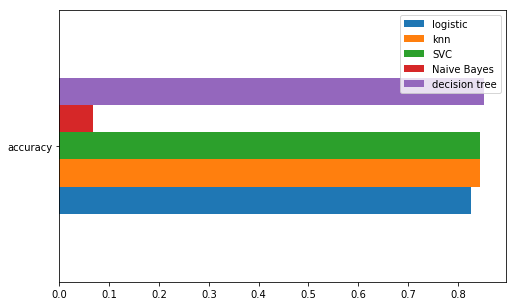

In [153]:
fig,ax = plt.subplots(figsize=(8,5))
mat1.plot(kind='barh',ax=ax)
ax.grid


In [154]:
np.unique(y_pred_test)

array(['Diabetes', 'GDM', 'Type1 diabetes', 'Type2 diabetes',
       'denovo Type1 diabetes', 'denovo Type2 diabetes'], dtype=object)

In [155]:
X_test.iloc[500].values.reshape(1,11)
class_tree.predict([[4.60000000e+01, 1.00000000e+00, 7.00000000e+01, 1.50000000e+02,
        0.00000000e+00, 3.11111111e-03, 1.44070074e+02, 2.20384035e+02,
        8.20000000e+00, 1.56000000e+00, 8.00000000e-01]])
y_test[y_test == 'Type2 diabetes'].shape

(4372,)

In [156]:
# save the model to disk
# filename = 'class_tree_model.sav'
# file1 = 'class_tree.pkl'
# pickle.dump(class_tree, open(file1, 'wb'))
# #load
# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred_test = loaded_model.predict(X_test)
# print(metrics.accuracy_score(y_test,y_pred_test)) #85.1%